In [4]:
import matplotlib.pyplot as plt
from sklearn. naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn. metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_wine

In [7]:
# 导入数据，分别为输入特征和标签
wine = load_wine ()
X=wine.data
Y=wine.target
# 划分训练集和测试集 2:8
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
# 输出结果
print("训练集特征形状：",X_train.shape)
print("测试集特征形状:",X_test.shape)
print("训练集标签形状:",y_train.shape)
print("测试集标签形状：",y_test. shape)

训练集特征形状： (142, 13)
测试集特征形状: (36, 13)
训练集标签形状: (142,)
测试集标签形状： (36,)


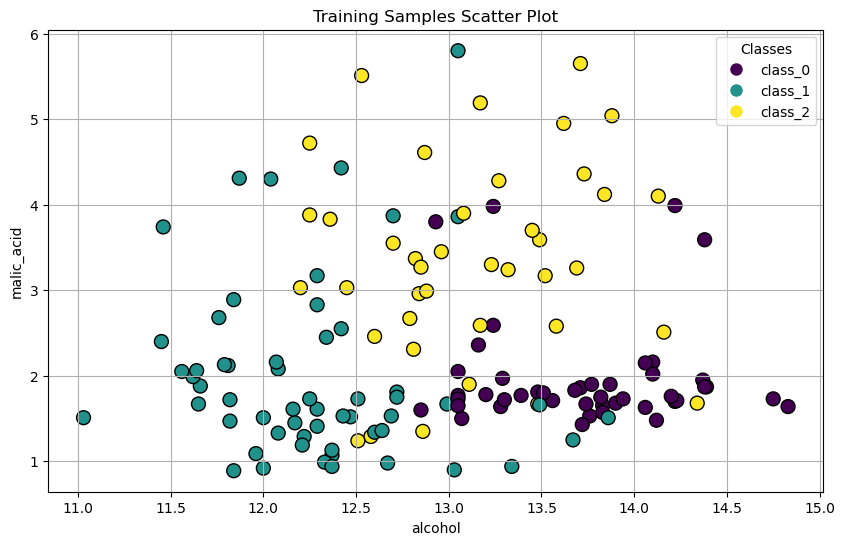

In [10]:
# 可视化
feature_names = wine.feature_names
target_names = wine. target_names
# 绘制散点图
plt.figure(figsize=(10, 6))
# 使用前两个特征进行绘图（sepallength和sepalwidth）
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis',edgecolor ='k', s=100)
# 设置图形的标签和标题
plt.xlabel (feature_names [0]) # Sepal长度
plt.ylabel(feature_names[1]) # Sepal宽度
plt.title('Training Samples Scatter Plot')
# 生成图例：每个类别一个点
handles = [plt.Line2D([0],[0], marker='o',color='w',
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) 
           for i in range(len(target_names))]
plt.legend(handles, target_names, title="Classes")
plt.grid()
plt.show()

Accuracy :1.00
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



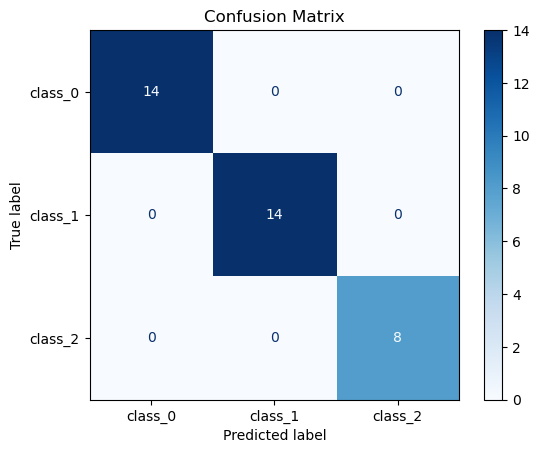

In [13]:
# 定义和训练贝叶斯模型
nb_model = GaussianNB ()
nb_model. fit(X_train, y_train)
# 在测试集上进行预测
nb_y_pred = nb_model.predict (X_test)
# 获取预测概率
nb_y_pred_proba = nb_model. predict_proba(X_test)
# 评估模型
accuracy = accuracy_score(y_test, nb_y_pred)
conf_matrix = confusion_matrix(y_test, nb_y_pred)
class_report = classification_report(y_test, nb_y_pred, target_names=target_names)

# 打印评价指标
print(f"Accuracy :{accuracy:.2f}")
print ("Confusion Matrix:\n", conf_matrix)
print ("Classification Report:\n", class_report)

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

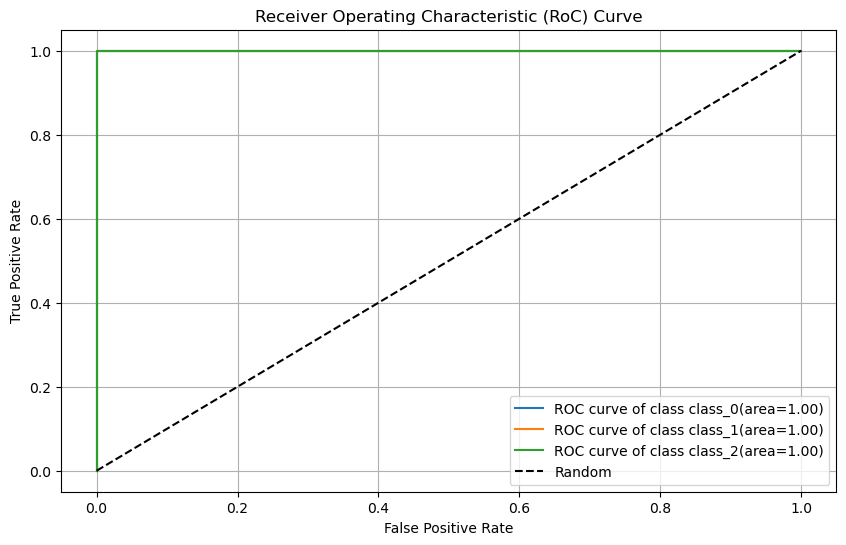

In [19]:
# 绘制AUC-ROC曲线
plt.figure(figsize=(10, 6))
# 计算ROC曲线
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(target_names)
for i in range(n_classes):
    fpr[i],tpr[i],_ =  roc_curve(y_test, nb_y_pred_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i],tpr[i])
# 绘制每个类别的ROC曲线
for i in range(n_classes) :
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {target_names[i]}(area={roc_auc[i]:.2f})')
# 绘制随机猜测基线
plt.plot([0, 1],[0,1],'k--',label='Random')
# 设置图形的标签和标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RoC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [20]:
# #训练决策树模型
from sklearn. tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit (X_train, y_train)
# 使用决策树进行预测
dt_pred = dt_model.predict(X_test)

In [21]:
# 指标
# 计算准确率
dt_accuracy=accuracy_score(y_test, dt_pred)
# 评估模型
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
# 打印分类报告
print("Decision Tree Classification Report:\n", classification_report(y_test,dt_pred, target_names=target_names))


Decision Tree Accuracy: 0.94
Decision Tree Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



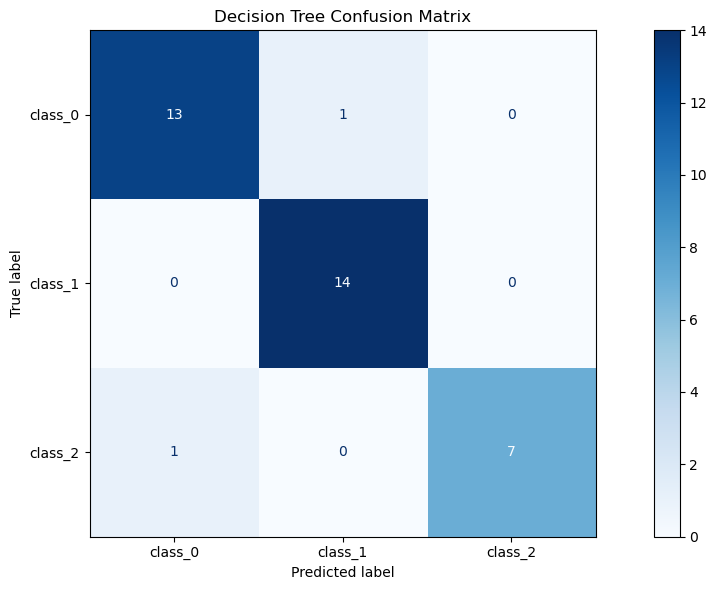

In [35]:
# 绘制混淆矩阵
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix,
                       display_labels=target_names).plot(cmap='Blues', ax=plt.gca())
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout ()
plt.show()

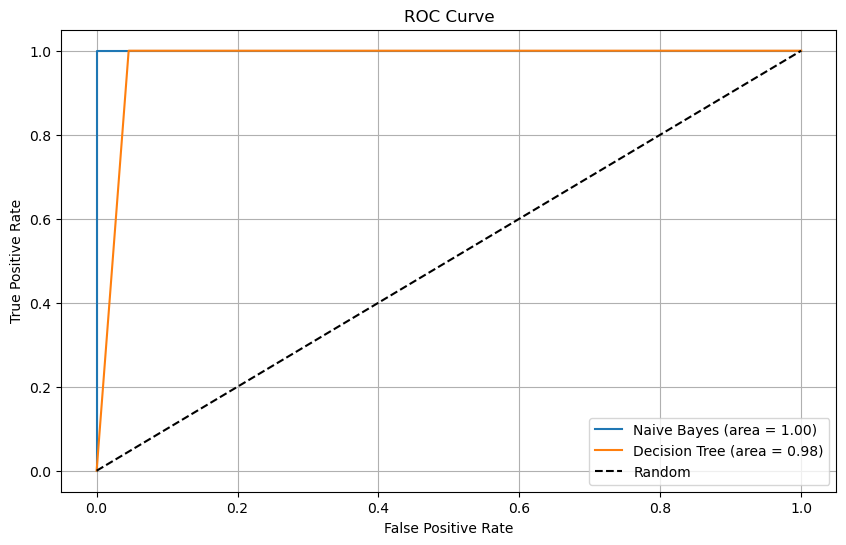

In [38]:
# 获取预测概率
dt_y_pred_proba = dt_model.predict_proba(X_test)
# 计算ROC曲线
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_pred_proba[:, 1], pos_label=1)
roc_auc_nb = auc (fpr_nb, tpr_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_pred_proba[:, 1], pos_label=1)
roc_auc_dt = auc(fpr_dt,tpr_dt)
# 绘制AUC-ROC曲线
plt.figure(figsize=(10,6))
# 绘制朴素贝叶斯ROC曲线
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (area = {roc_auc_nb:.2f})')
# 绘制决策树ROC曲线
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (area = {roc_auc_dt:.2f})')
# 绘制随机猜测基线
plt.plot([0, 1],[0, 1],'k--',label='Random')
# 设置图形的标签和标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


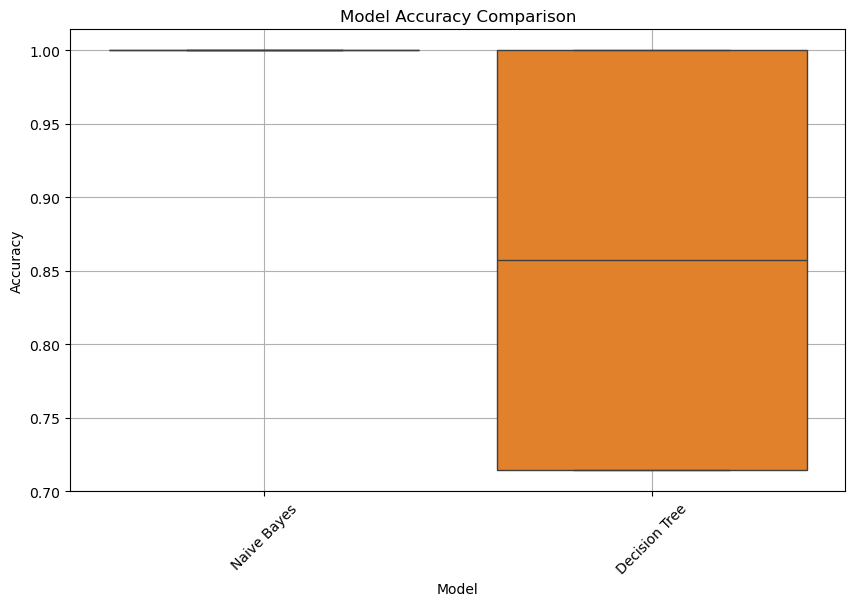

In [41]:
# 交叉验证
import pandas as pd
from sklearn.model_selection import cross_val_score
models={
    'Naive Bayes': nb_model,
    'Decision Tree': dt_model
}

results =[]
for model_name,model in models.items():
    scores = cross_val_score(model, X_test, y_test,cv=5)  # 5折交叉验证
    results.append(scores)
# 转换为DataFrame便于绘图
results_df = pd.DataFrame(results, index=models.keys()).T
#绘制箱线图
plt.figure(figsize=(10,6))
sns.boxplot(data=results_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid()
plt.show()